<a href="https://colab.research.google.com/github/rajayarli/SIT708-HD/blob/master/SIT723.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Package Install And Intialisation**

In [ ]:
# GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

In [ ]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin" # the model is in bin format

In [ ]:
from huggingface_hub import hf_hub_download


In [ ]:
from llama_cpp import Llama


In [ ]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

# **Loading the Model**

In [ ]:
# GPU
lcpp_llm = None
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [ ]:
# See the number of layers in GPU
lcpp_llm.params.n_gpu_layers

32

#**Creating a Pre-processing Prompt Template**

In [ ]:
#original_message = "i need to tell something important to you, call me 92834792837"
original_message = "Hey Alex, hope you're doing well. Just wanted to let you know that I've moved to a new place. My new address is 126 Brook Lane, near the old mill. It's a cozy little spot! Also, I've changed my phone number; it's now +123456789. Let's catch up soon, maybe over coffee this weekend?"

prompt = "Enhance the text for clarity, summarize, or transform it for efficient transmission."
inp= prompt+"this is the message: "+original_message
response = lcpp_llm(inp, max_tokens=256, echo=True)
print(response)


Llama.generate: prefix-match hit


{'id': 'cmpl-d61ca20f-2e1e-42ba-8986-db27b3c196bd', 'object': 'text_completion', 'created': 1705471334, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': 'Enhance the text for clarity, summarize, or transform it for efficient transmission.this is the message: Hey Alex, hope you\'re doing well. Just wanted to let you know that I\'ve moved to a new place. My new address is 126 Brook Lane, near the old mill. It\'s a cozy little spot! Also, I\'ve changed my phone number; it\'s now +123456789. Let\'s catch up soon, maybe over coffee this weekend? Take care! Best, Sam. How can we improve/optimize this message for clarity, brevity, or efficiency?\n\nHere are some possible improvements/optimizations for the message:\n\n1. Clarify the location: Instead of using "near the old mill," consider providing a more specific landmark or cross streets to help Alex locate

In [ ]:
# Define the original message
original_message = "Hey Alex, hope you're doing well. Just wanted to let you know that I've moved to a new place. My new address is 126 Brook Lane, near the old mill. It's a cozy little spot! Also, I've changed my phone number; it's now +123456789. Let's catch up soon, maybe over coffee this weekend?"
extraction_prompt ="Summarize the text in half its length while retaining the key info and use short forms: [Your Text Here]"

# Craft a prompt to extract the main intent in a concise format
extraction_input = f"{extraction_prompt} '{original_message}'"

# Make an API call to Llama2 with the extraction prompt
extraction_response = lcpp_llm(extraction_input, max_tokens=256, echo=False)  # Set echo to False
response_text = extraction_response["choices"][0]["text"]
response_text=response_text.strip()
# Print the extracted response
print(response_text)


Llama.generate: prefix-match hit


Here's the summary:
Hey Alex, moved to 126 Brook Lane (near old mill). New phone number is +123456789. Coffee this weekend?


#**JSCC framework**


In [ ]:
!pip install pyldpc
!pip install reedsolo


Original: Here's the summary:
Hey Alex, moved to 126 Brook Lane (near old mill). New phone number is +123456789. Coffee this weekend?
Encoded: b'SGVyZSdzIHRoZSBzdW1tYXJ5OgpIZXkgQWxleCwgbW92ZWQgdG8gMTI2IEJyb29rIExhbmUgKG5lYXIgb2xkIG1pbGwpLiBOZXcgcGhvbmUgbnVtYmVyIGlzICsxMjM0NTY3ODkuIENvZmZlZSB0aGlzIHdlZWtlbmQ/'
Decoded: Here's"e summasy:
Hey Alex, moved to 126 Brook Lane (near old mil). New phone number is +123456789. Coffee this weekend?


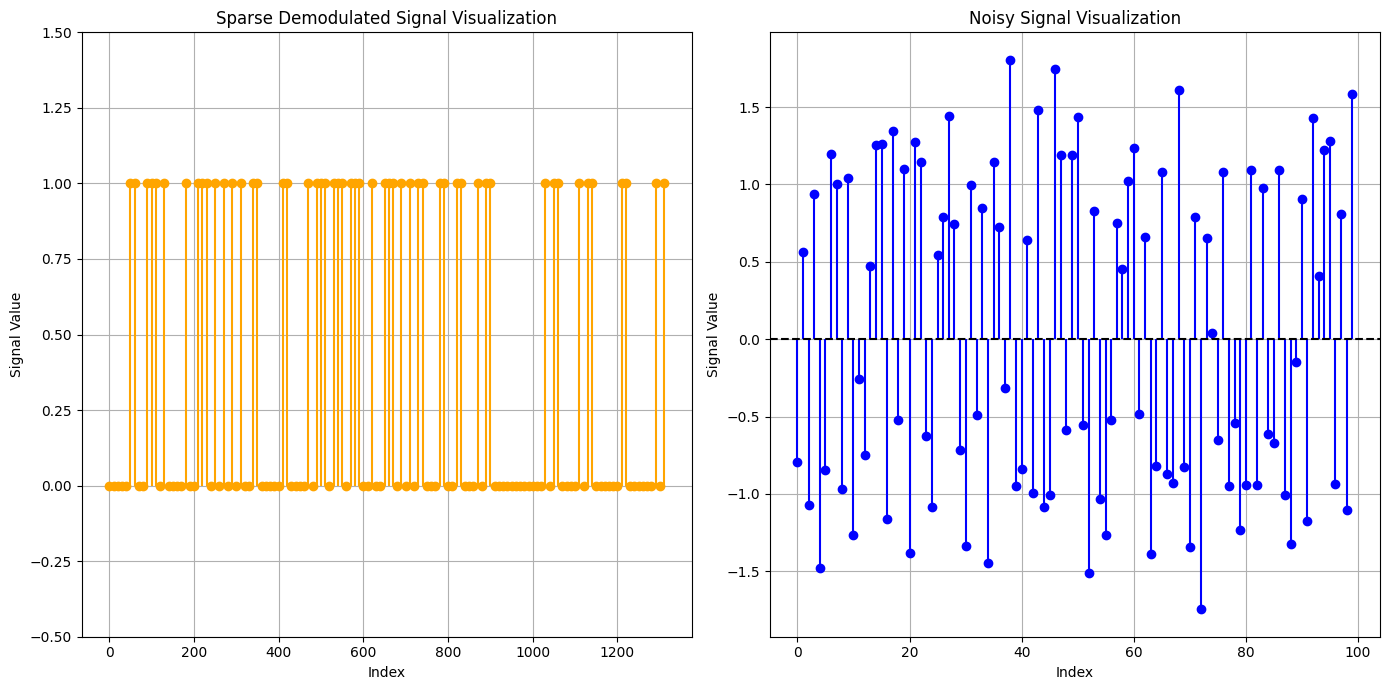

In [ ]:
import numpy as np
import base64
import matplotlib.pyplot as plt

def base64_encode(data):
    """Encode data using Base64."""
    return base64.b64encode(data.encode())

def base64_decode(encoded_data):
    """Decode Base64 encoded data, handling padding errors."""
    # Adjust the length of the data to be a multiple of 4
    padding = 4 - (len(encoded_data) % 4) if len(encoded_data) % 4 != 0 else 0
    encoded_data += b'=' * padding
    try:
        return base64.b64decode(encoded_data, validate=True).decode('utf-8', errors='ignore')
    except Exception as e:
        return f"Decoding error: {e}"


def bpsk_modulation(bits):
    """Modulate the input bits using BPSK."""
    return np.array([-1 if bit == 0 else 1 for bit in bits])

def binary_array_to_bytearray(binary_array):
    """Convert a binary array to a bytearray."""
    binary_string = ''.join(map(str, binary_array))
    byte_array = bytearray()
    for i in range(0, len(binary_string), 8):
        byte = binary_string[i:i+8]
        byte_array.append(int(byte, 2))
    return byte_array

def bpsk_demodulation(signal):
    """Demodulate a signal using BPSK."""
    threshold = np.mean(signal)
    return np.array([0 if s < threshold else 1 for s in signal])

def add_channel_noise(signal, noise_level):
    """Add noise to a signal."""
    noise = np.random.normal(0, noise_level, len(signal))
    return signal + noise

def jscc_framework(text, channel_error_rate):
    """JSCC framework using Base64 encoding and BPSK modulation."""
    # Source Encoding using Base64
    encoded_data = base64_encode(text)

    # Convert encoded data to a binary array for modulation
    modulated_signal = bpsk_modulation(np.unpackbits(bytearray(encoded_data)))

    # Simulate Channel (Add Noise)
    noisy_signal = add_channel_noise(modulated_signal, channel_error_rate)

    # BPSK Demodulation
    demodulated_signal = bpsk_demodulation(noisy_signal)

    # Convert demodulated signal to bytearray
    demodulated_bytearray = binary_array_to_bytearray(demodulated_signal)

    # Source Decoding using Base64
    decoded_data = base64_decode(demodulated_bytearray)


    return text, encoded_data, noisy_signal, demodulated_signal, decoded_data

# Example usage
source_text = response_text
channel_error_rate = 0.3491
original, encoded, noisy, demodulated, decoded = jscc_framework(source_text, channel_error_rate)
print("Original:", original)
print("Encoded:", encoded)
print("Decoded:", decoded)

import matplotlib.pyplot as plt

# Demodulated signal data (only a subset for visualization)
n = 10  # Define the nth value for sparsity
x_vals = list(range(0, len(demodulated), n))
y_vals = [demodulated[i] for i in x_vals]

# Noisy signal data (only the first 100 samples for enhanced visualization)
subset_noisy_signal = noisy[:100]  # Adjust the slice for more or fewer points

# Create a new figure with larger size for clarity
plt.figure(figsize=(14, 7))

# First subplot for the demodulated signal
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.stem(x_vals, y_vals, basefmt=" ", linefmt='orange', markerfmt='o')
plt.title('Sparse Demodulated Signal Visualization')
plt.xlabel('Index')
plt.ylabel('Signal Value')
plt.grid(True)
plt.ylim(-0.5, 1.5)

# Second subplot for the noisy signal subset
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.stem(range(len(subset_noisy_signal)), subset_noisy_signal, basefmt=" ", linefmt='blue', markerfmt='bo')
plt.axhline(y=0, color='k', linestyle='--')  # Zero line for reference
plt.title('Noisy Signal Visualization')
plt.xlabel('Index')
plt.ylabel('Signal Value')
plt.grid(True)

# Show the combined plot
plt.tight_layout()
plt.show()





Here's the summary:
Hey Alex, moved to 126 Brook Lane (near old mill). New phone number is +123456789. Coffee this weekend?
Here's"e summasy:
Hey Alex, moved to 126 Brook Lane (near old mil). New phone number is +123456789. Coffee this weekend?
None


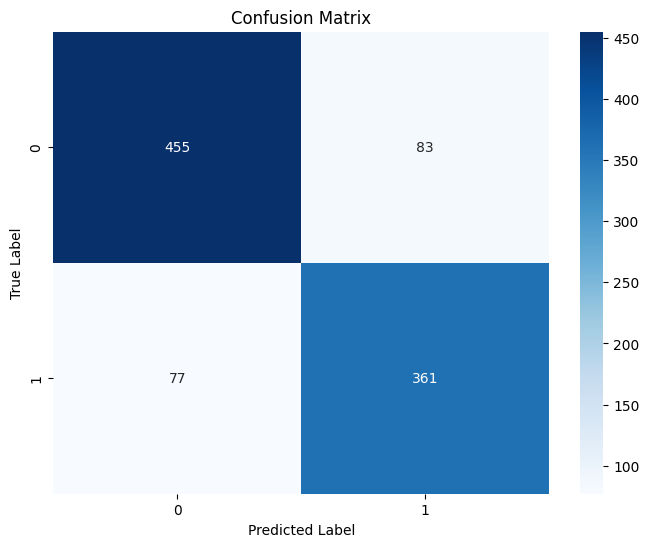

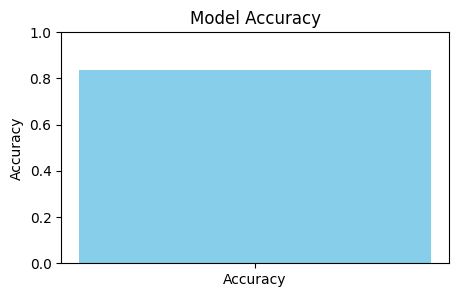

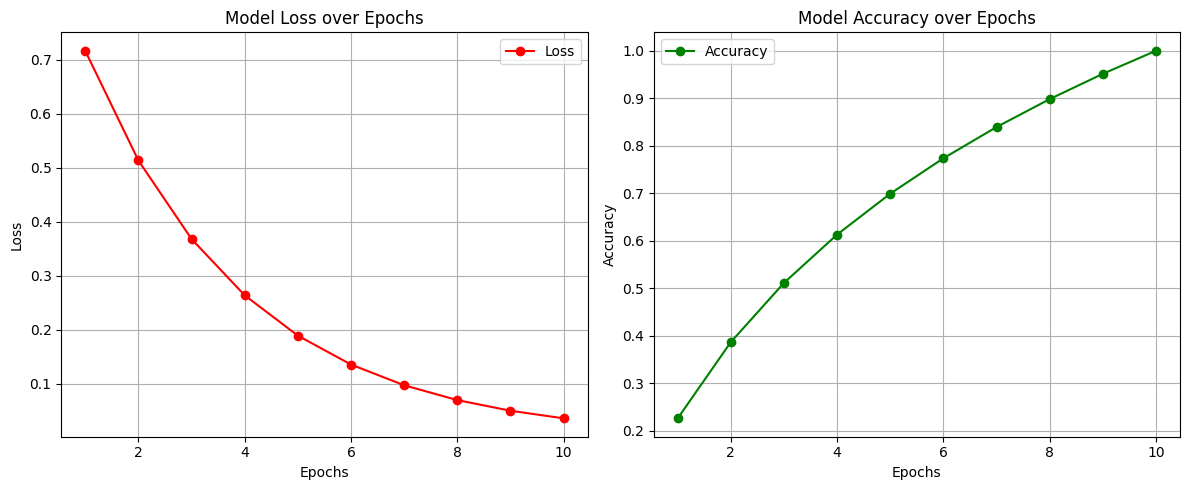

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming we have a function that converts the text to a binary representation
def text_to_binary(text):
    return ''.join(format(ord(i), '08b') for i in text)

# Assuming we have a function that compares the original and decoded binary data
def compare_data(original, decoded):
    original_binary = text_to_binary(original)
    decoded_binary = text_to_binary(decoded)
    return [int(b) for b in original_binary], [int(b) if b != '' else 0 for b in decoded_binary]
print(original)
print(decoded)


import re

# Assuming 'decoded' is the variable containing the decoded text with the content to extract
# Extracting the text inside the quotes
match = re.search(r"'(.*?)'", decoded)
deco = match.group(1) if match else None

deco
print(deco)

# Create a confusion matrix for the original and decoded binary data
original_binary, decoded_binary = compare_data(original, decoded)

# Make lengths of both lists equal
min_length = min(len(original_binary), len(decoded_binary))
original_binary = original_binary[:min_length]
decoded_binary = decoded_binary[:min_length]

# Calculate confusion matrix
conf_matrix = confusion_matrix(original_binary, decoded_binary)

# Calculate accuracy
accuracy = np.sum(np.array(original_binary) == np.array(decoded_binary)) / len(original_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting accuracy
plt.figure(figsize=(5, 3))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()

# Assuming we need to plot some additional important graphs for the model
# For demonstration, let's plot a simple line graph representing hypothetical model performance metrics

# Hypothetical data for model performance metrics
epochs = np.arange(1, 11)
loss = np.exp(-epochs/3)
accuracy = np.log(epochs/2 + 1) / np.log(epochs[-1]/2 + 1)

# Plotting loss and accuracy over epochs
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, marker='o', color='red', label='Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, marker='o', color='green', label='Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Creating a Post-processing Prompt Template

In [ ]:

# Craft a prompt to expand on the key semantics with additional context or information
expansion_prompt = "Re-write the message for clarity, relevance, and coherence, Ensure it maintains the original intent of the key semantics and adds meaningful context:"
expansion_input = f"{expansion_prompt} {decoded}"

# Make an API call to Llama2 with the expansion prompt
expansion_response = lcpp_llm(expansion_input, max_tokens=512, echo=True)
expanded_message = expansion_response["choices"][0]["text"].strip()

print(expanded_message)



Llama.generate: prefix-match hit


Re-write the message for clarity, relevance, and coherence, Ensure it maintains the original intent of the key semantics and adds meaningful context: Here's"e summasy:
Hey Alex, moved to 126 Brook Lane (near old mil). New phone number is +123456789. Coffee this weekend?
Hi Alex, Hope you are doing well! Just wanted to let you know that I have recently moved to 126 Brook Lane, which is near the old mill. My new phone number is now +123456789. Would love to catch up with you over coffee this weekend if you're free? Looking forward to hearing from you!


In [ ]:
# Hey Alex, moved to 126 Brook Lane (near old mil). New phone number is +123456789. Coffee this weekend?
# Hi Alex, Hope you are doing well! Just wanted to let you know that I have recently moved to 126 Brook Lane,
#  which is near the old mill. My new phone number is now +123456789. Would love to catch up with you over coffee this weekend if you're free? Looking forward to hearing from you!